# Organic Market Basket Analysis

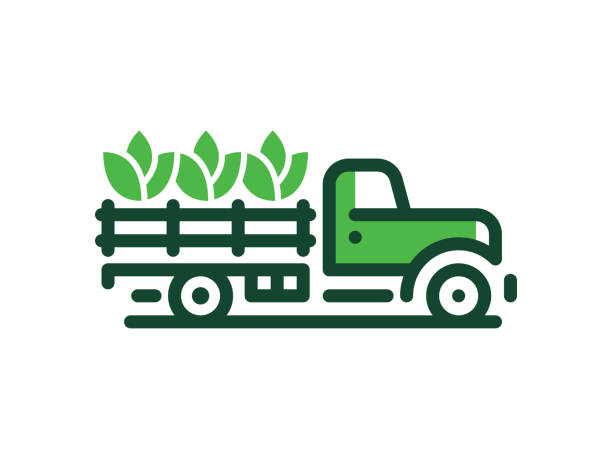

# Business Overview

The organic grocery market is experiencing rapid growth, driven by increasing consumer awareness of health and sustainability. With the demand for online shopping on the rise, GreenGrocer's Organic Grocery Delivery Service is strategically positioned to tap into this expanding market.

Green Grocer wants to elevate the customer experience and has tasked us to find key factors for predicting customer reorders to optimize marketing strategies and identify frequently purchased items for improved product recommendations and cross-selling opportunities. 

# Data Overview

The dataset used comes from 3 million grocery orders from more than 200,000 Instacart users. The data was filtered down to only focus on Organic Products. The dataset includes information on the following:

- User ID
- Order Number
- Order ID
- Order Day of Week
- Order Hour of Day
- Days Since Prior Order (Capped at 30)
- Product Name
- Product ID
- Aisle 
- Aisle_ID
- Department 
- Department ID
- Add_to_Cart_Order
- Reordered


## Results
Based on the analysis and modeling here are four actionable recommendations:

**1. Promote Organic Produce:**
- Targeted marketing campaigns on organic products
- Highlight the benefits of organic items to attract and retain customers
  
**2. Encourage Frequent Purchases:**
- Implement Loyalty programs & Subscription options
- Personalize recommendations based on purchase history/frequent purchases
  
**3. Leverage Basket Size:**
- Implement strategies to encourage customers to add more items to carts 
- Bundle related products
- Special deals for bulk purchases
  
**4. Enhance Product Placement:**
- Products added later to the cart have a lower chance of being reordered. Explore ways to streamline the add-to-cart process and ensure that customers find what they need quickly
- Optimize the user interface for easier shopping
- Implement "quick add" or one-click reordering features

In conclusion, by implementing these recommendations, GreenGrocer can enhance customer satisfaction, increase customer retention, and drive higher reorder rates, ultimately leading to improved business performance and growth.

---
# Data Exploration

In [1]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#read in files
aisle = pd.read_csv('data/aisles.csv')
department = pd.read_csv('data/departments.csv')
orders = pd.read_csv('data/orders.csv')
products = pd.read_csv('data/products.csv')
order_products_prior = pd.read_csv('data/order_products__prior.csv')

To start, I will read in the first few rows from each dataframe, explore the data in each, and check the summary statistics

In [3]:
dataframes = ['aisle', 'department', 'orders', 'order_products_prior', 'products']

for df_name in dataframes:
    df = globals()[df_name]
    print(f"DataFrame: {df_name}")
    print("Number of rows:", len(df))
    display(df.head())
    print("Info:")
    display(df.info())
    print("Describe:")
    display(df.describe())
    print("=" * 40)

DataFrame: aisle
Number of rows: 134


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


None

Describe:


,aisle_id
count,134.000000
mean,67.500000
std,38.826537
min,1.000000
25%,34.250000
50%,67.500000
75%,100.750000
max,134.000000


DataFrame: department
Number of rows: 21


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


None

Describe:


,department_id
count,21.000000
mean,11.000000
std,6.204837
min,1.000000
25%,6.000000
50%,11.000000
75%,16.000000
max,21.000000


DataFrame: orders
Number of rows: 3421083


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


None

Describe:


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.214874e+06
mean,1.710542e+06,1.029782e+05,1.715486e+01,2.776219e+00,1.345202e+01,1.111484e+01
std,9.875817e+05,5.953372e+04,1.773316e+01,2.046829e+00,4.226088e+00,9.206737e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.552715e+05,5.139400e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.710542e+06,1.026890e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.565812e+06,1.543850e+05,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,3.421083e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


DataFrame: order_products_prior
Number of rows: 32434489


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


None

Describe:


,order_id,product_id,add_to_cart_order,reordered
count,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07
mean,1.710749e+06,2.557634e+04,8.351076e+00,5.896975e-01
std,9.873007e+05,1.409669e+04,7.126671e+00,4.918886e-01
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.559430e+05,1.353000e+04,3.000000e+00,0.000000e+00
50%,1.711048e+06,2.525600e+04,6.000000e+00,1.000000e+00
75%,2.565514e+06,3.793500e+04,1.100000e+01,1.000000e+00
max,3.421083e+06,4.968800e+04,1.450000e+02,1.000000e+00


DataFrame: products
Number of rows: 49688


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


None

Describe:


,product_id,aisle_id,department_id
count,49688.000000,49688.000000,49688.000000
mean,24844.500000,67.769582,11.728687
std,14343.834425,38.316162,5.850410
min,1.000000,1.000000,1.000000
25%,12422.750000,35.000000,7.000000
50%,24844.500000,69.000000,13.000000
75%,37266.250000,100.000000,17.000000
max,49688.000000,134.000000,21.000000


I merge all the dataframes together using an inner join and will start me analysis

Note that the days are capped at 30 so 30 is actually 30+ so to avoid any skewed data we are going to cap at 29

In [4]:
orders = orders.loc[orders['days_since_prior_order'] <= 29]

In [10]:
#merging files together
df = pd.merge(order_products_prior,products, on='product_id', how='inner')
df = pd.merge(df, aisle, on='aisle_id', how='inner')
df = pd.merge(df, department, on='department_id', how='inner')
df = pd.merge(df, orders, on='order_id', how='inner')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27286364 entries, 0 to 27286363
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   product_id              int64  
 2   add_to_cart_order       int64  
 3   reordered               int64  
 4   product_name            object 
 5   aisle_id                int64  
 6   department_id           int64  
 7   aisle                   object 
 8   department              object 
 9   user_id                 int64  
 10  eval_set                object 
 11  order_number            int64  
 12  order_dow               int64  
 13  order_hour_of_day       int64  
 14  days_since_prior_order  float64
dtypes: float64(1), int64(10), object(4)
memory usage: 3.3+ GB


---
# Data Exploration

To start, lets look at all the products in the data set and see the differences between Organic and Non-Organic products in orders

In [12]:
#creating a binary column for organic products
df['organic'] = df['product_name'].str.lower().str.contains('organic').astype(int)

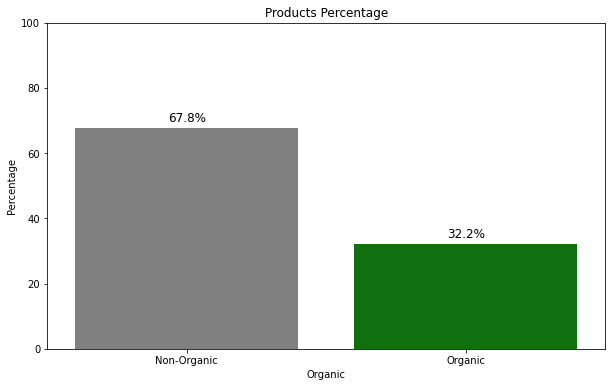

In [13]:
organic_per = df[["organic","order_id"]].groupby("organic").count()
organic_per = organic_per.apply(lambda x: 100 * x / x.sum()).reset_index().rename(columns={'order_id': 'percentage'})

plt.figure(figsize=(10, 6))
fig = sns.barplot(data=organic_per, x="organic", y="percentage", palette=['gray', 'green'])
fig.set(title="Products Percentage", xlabel="Organic", ylabel="Percentage")
for patch in fig.patches:
    height = patch.get_height()
    fig.annotate('{:.1f}%'.format(height), (patch.get_x() + patch.get_width() / 2, height + 2),
                 ha='center', fontsize=12)
plt.xticks([0, 1], ['Non-Organic', 'Organic'])
plt.ylim(0, 100)
plt.show()

68% of items ordered are Non-Organic with only 32% of items being Organic, Next lets look at the average reorders between Organic and Non-Organic products

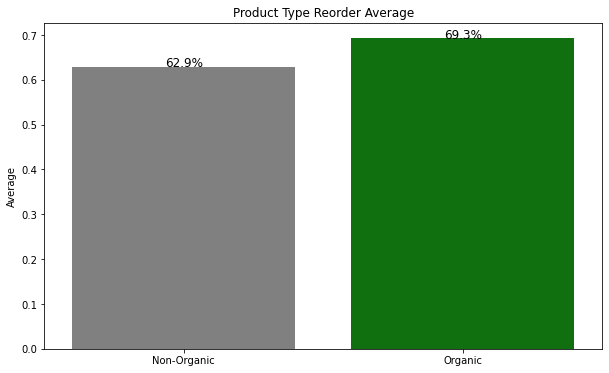

In [14]:
product_reorder = df[["organic","reordered"]].groupby("organic").mean().reset_index().rename(columns={'reordered': 'mean'})

plt.figure(figsize=(10, 6))
fig = sns.barplot(data=product_reorder, x="organic", y="mean", palette=['gray', 'green'])
fig.set(title="Product Type Reorder Average", xlabel="", ylabel="Average")
for i in range(len(product_reorder)):
    product_reorder.loc[i, "mean"] = product_reorder.loc[i, "mean"] * 100
patches = fig.patches
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()
    fig.annotate('{:.1f}%'.format(product_reorder["mean"][i]), (x, y), ha='center', fontsize=12)
plt.xticks([0, 1], ['Non-Organic', 'Organic'])
plt.show()

Although Organic products make up about 32% of the items ordered they account for 65% of products reordered

Next lets look at what products are being sold the most. 

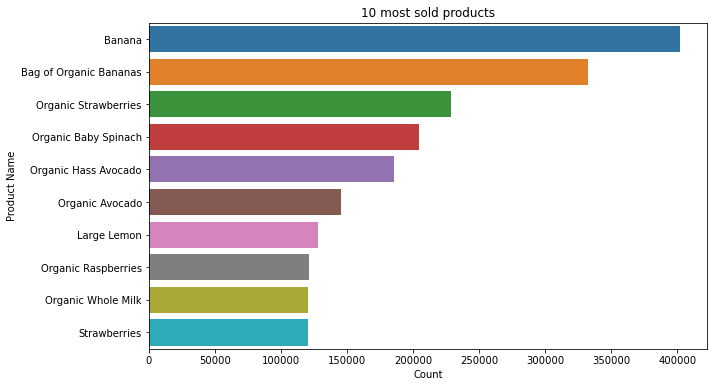

In [15]:
# Group by product name and count the occurrences
product_freq = df["product_name"].value_counts().reset_index()
product_freq.columns = ["product_name", "frequency"]

# Sort by frequency in descending order
sorted_products = product_freq.sort_values(by="frequency", ascending=False).head(10)
plt.figure(figsize=(10,6))
fig = sns.barplot(data=sorted_products, x="frequency", y="product_name")
fig.set(title="10 most sold products", xlabel="Count", ylabel="Product Name")
plt.show()

We can see that 6/10 of the top products sold are organic, I will create a binary column for Organic products using 1 for Organic and 0 for Non-Organic

** **
# Organic Analysis

Below I create my organic dataframe with only organic products and their associated data

In [16]:
#creating an organic dataframe
organic = df.loc[df['organic'] ==1]

In [17]:
organic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8786162 entries, 0 to 27286345
Data columns (total 16 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   product_id              int64  
 2   add_to_cart_order       int64  
 3   reordered               int64  
 4   product_name            object 
 5   aisle_id                int64  
 6   department_id           int64  
 7   aisle                   object 
 8   department              object 
 9   user_id                 int64  
 10  eval_set                object 
 11  order_number            int64  
 12  order_dow               int64  
 13  order_hour_of_day       int64  
 14  days_since_prior_order  float64
 15  organic                 int32  
dtypes: float64(1), int32(1), int64(10), object(4)
memory usage: 1.1+ GB


First, lets look at the top 10 Organic products sold

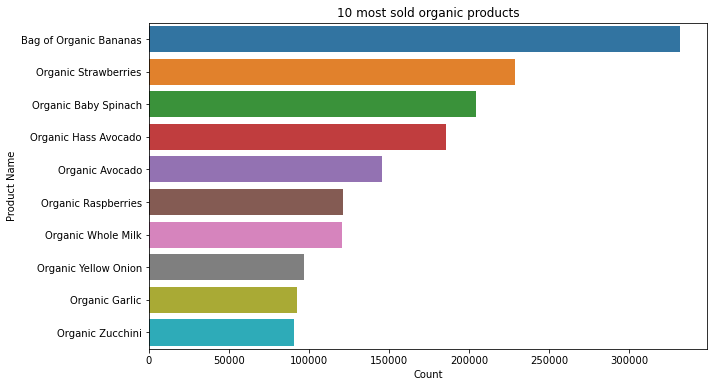

In [18]:
# Group by product name and count the occurrences
organic_products = organic["product_name"].value_counts().reset_index()
organic_products.columns = ["product_name", "frequency"]
sorted_organic_products = organic_products.sort_values(by="frequency", ascending=False).head(10)

plt.figure(figsize=(10,6))
fig = sns.barplot(data=sorted_organic_products,x="frequency", y="product_name")
fig.set(title="10 most sold organic products", xlabel="Count", ylabel="Product Name")
plt.show()

We can see that the majority of the top items sold are Organic Produce and Organic Whole Milk

Lets create another binary column called 'Organic Produce' for further Analysis

In [19]:
#creating an organic produce column
organic['organic_produce'] = np.where((organic['organic'] == 1) & (organic['department'] == 'produce'), 1, 0)

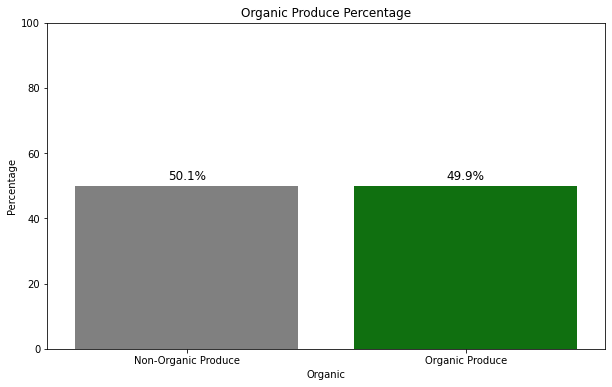

In [20]:
organic_pro = organic[["organic_produce", "order_id"]].groupby("organic_produce").count()
organic_pro = organic_pro.apply(lambda x: 100 * x / x.sum()).reset_index().rename(columns={'order_id': 'percentage'})

plt.figure(figsize=(10, 6))
fig = sns.barplot(data=organic_pro, x="organic_produce", y="percentage", palette=['gray', 'green'])
fig.set(title="Organic Produce Percentage", xlabel="Organic", ylabel="Percentage")
for patch in fig.patches:
    height = patch.get_height()
    fig.annotate('{:.1f}%'.format(height), (patch.get_x() + patch.get_width() / 2, height + 2),
                 ha='center', fontsize=12)
plt.xticks([0, 1], ['Non-Organic Produce', 'Organic Produce'])
plt.ylim(0, 100)
plt.show()

It is pretty much an even split between Organic Produce and Non-Organic Produce

Next ill check the average reorder on Organic and Non-Organic Produce

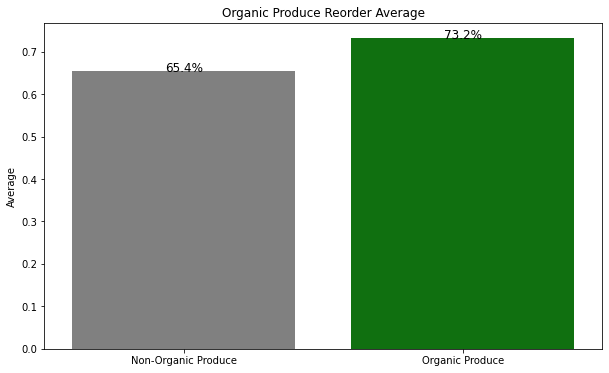

In [21]:
produce_reorder = organic[["organic_produce","reordered"]].groupby("organic_produce").mean().reset_index().rename(columns={'reordered': 'mean'})

plt.figure(figsize=(10, 6))
fig = sns.barplot(data=produce_reorder, x="organic_produce", y="mean", palette=['gray', 'green'])
fig.set(title="Organic Produce Reorder Average", xlabel="", ylabel="Average")
for i in range(len(produce_reorder)):
    produce_reorder.loc[i, "mean"] = produce_reorder.loc[i, "mean"] * 100
patches = fig.patches
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()
    fig.annotate('{:.1f}%'.format(produce_reorder["mean"][i]), (x, y), ha='center',fontsize=12)
plt.xticks([0, 1], ['Non-Organic Produce', 'Organic Produce'])
plt.show()

It looks like Organic Produce has an average reorder rate of 67%

Next I am creating a word cloud of product names to see what items occur most frequently 

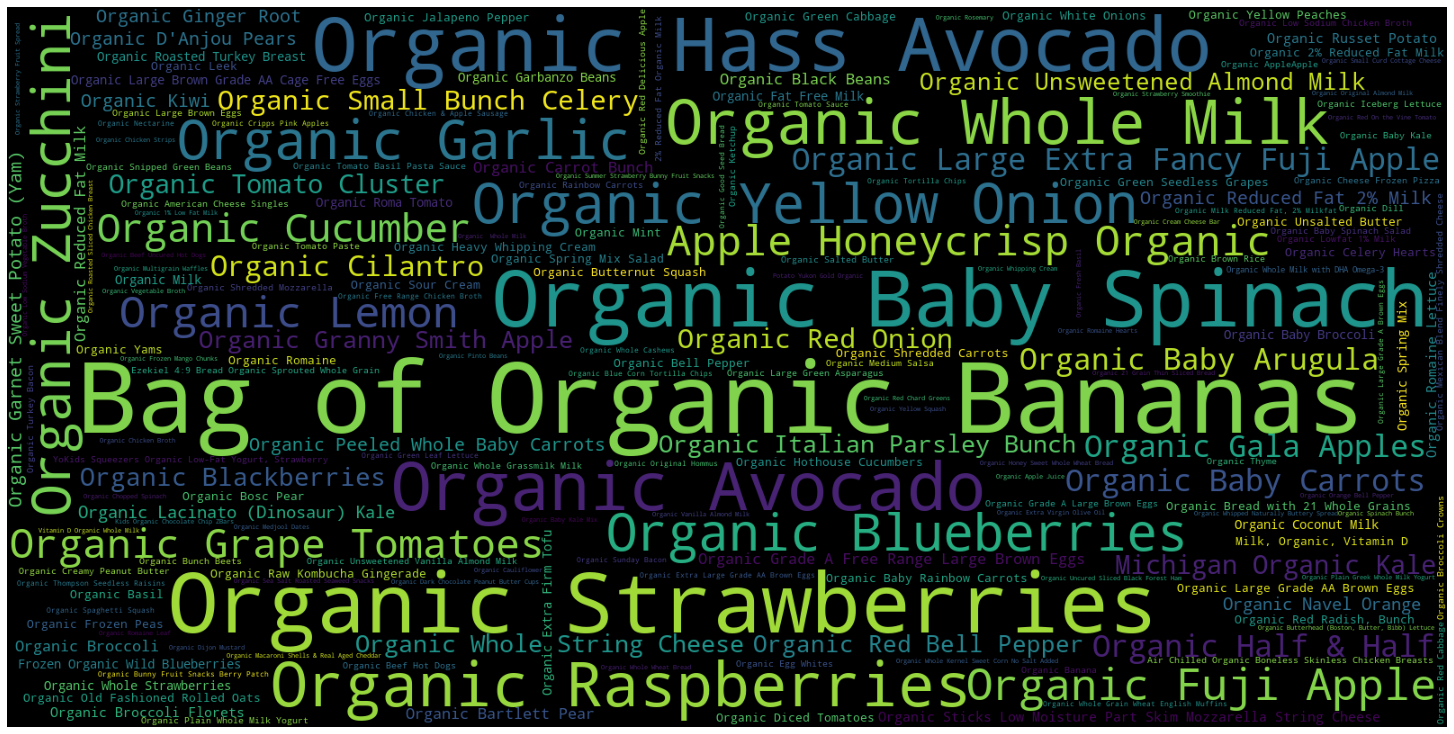

In [22]:
from wordcloud import WordCloud

# Ploting word cloud
cloud_dict=organic.product_name.value_counts().to_dict()

# Lets first convert the 'result' dictionary to 'list of tuples'
tupels = dict(cloud_dict.items())
#Initializing WordCloud using frequencies of tags.
wordcloud = WordCloud(background_color='black',width=1600,height=800).generate_from_frequencies(tupels)
fig = plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

As we can see most of the user and orders purchase a lot of Bananas,Strawberries, Baby Spinach and Avocados as shown in plot using Word Count

Lets plot them

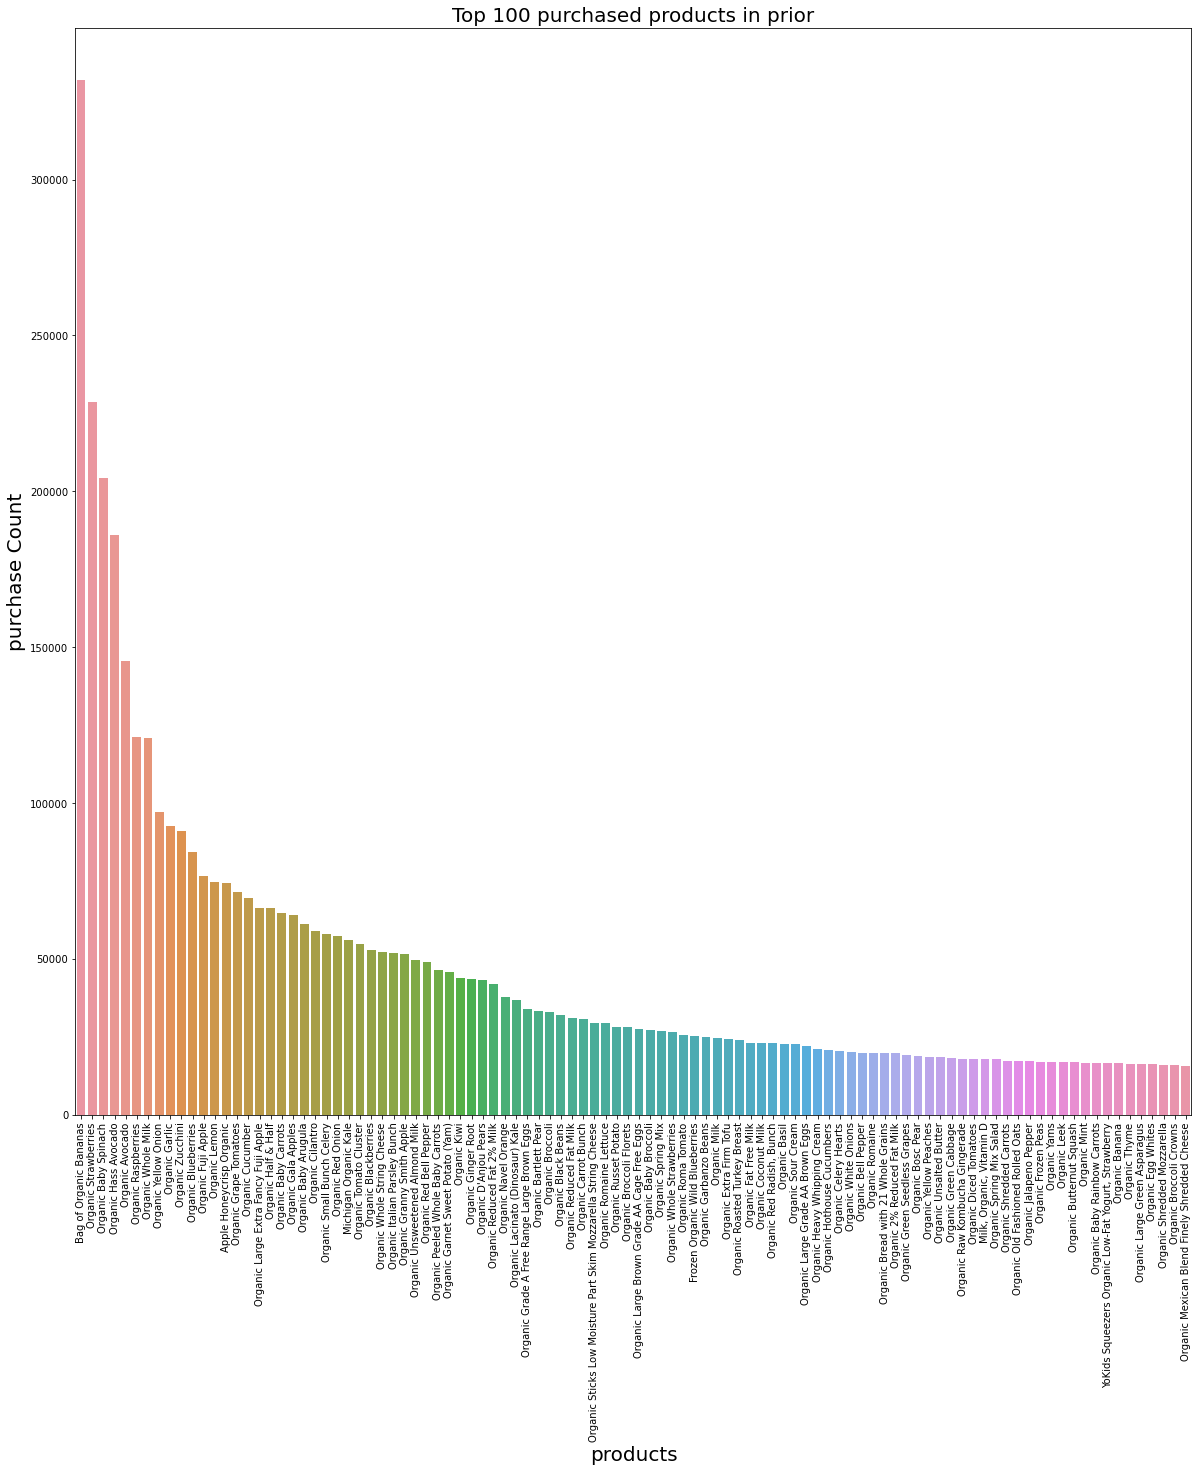

In [23]:
top_products = organic.product_name.value_counts().head(100)

plt.figure(figsize=(20,20))
sns.barplot(top_products.index, top_products.values)
plt.title('Top 100 purchased products in prior',fontsize=20)
plt.xticks(rotation='vertical')
plt.xlabel('products',fontsize=20)
plt.ylabel('purchase Count',fontsize=20)
plt.show()

Next, lets explore the Hour and Day columns

In the Organic dataframe I have:
- 'Order_dow' for day of the week an order was placed in numerical format 0-6
- 'Oder_hour_of_day' for the time of the day that order was placed 0-23, with 0 being midnight and 23 being 11:00pm

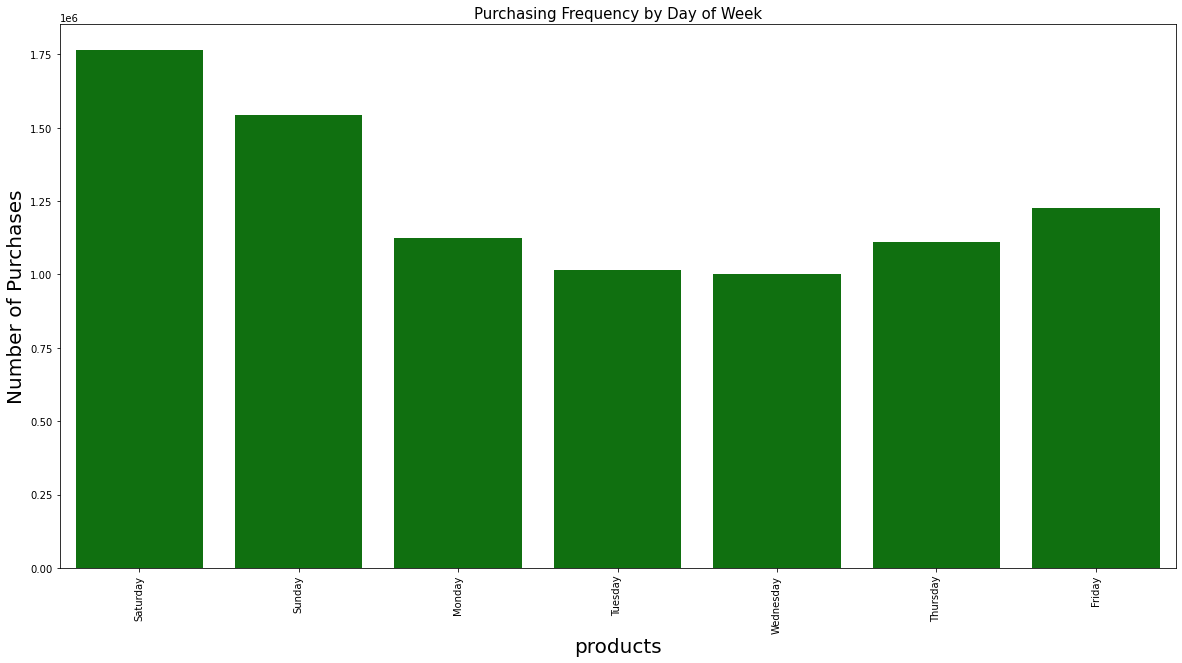

In [29]:
day_order = organic.order_dow.value_counts().sort_index()

plt.figure(figsize=(20,10))
sns.barplot(day_order.index, day_order.values, color='green')
plt.title('Purchasing Frequency by Day of Week',fontsize=15)
plt.xticks(ticks=day_order.index,rotation='vertical',labels=['Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday'])
plt.xlabel('products',fontsize=20)
plt.ylabel('Number of Purchases',fontsize=20)
plt.show()

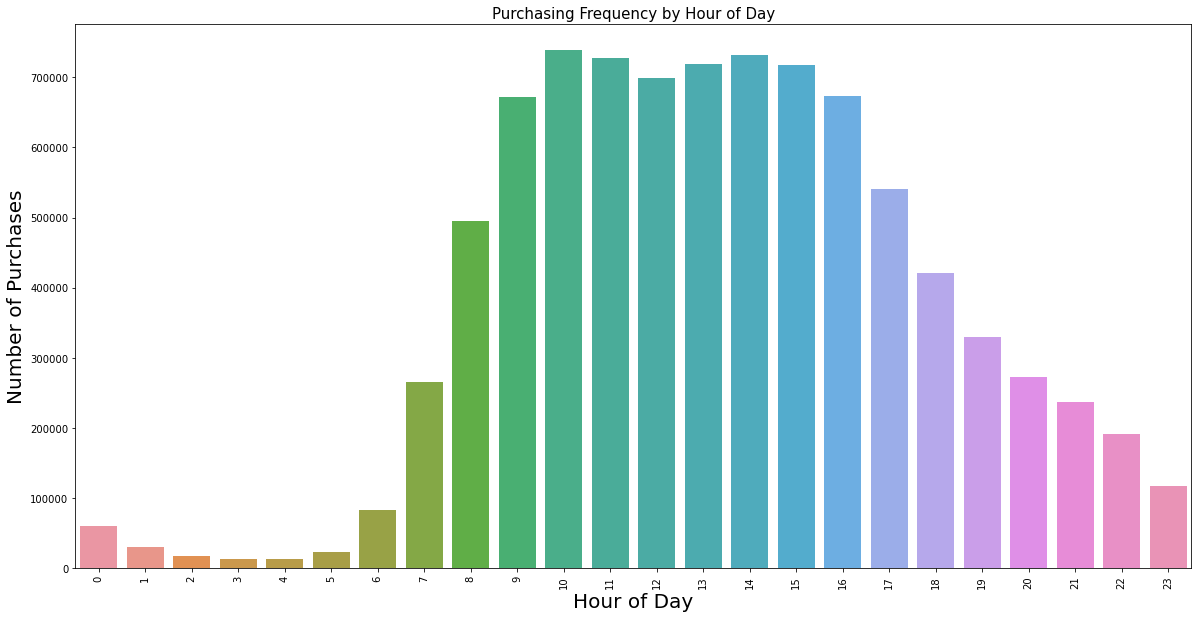

In [25]:
hour_count = organic.order_hour_of_day.value_counts().sort_index()
plt.figure(figsize=(20,10))
sns.barplot(hour_count.index,hour_count.values)
plt.title('Purchasing Frequency by Hour of Day',fontsize=15)
plt.xticks(ticks=hour_count.index,rotation='vertical')
plt.xlabel('Hour of Day',fontsize=20)
plt.ylabel('Number of Purchases',fontsize=20)
plt.show()

From the two plots above we can see that order frequency is highest on the weekends with the peak hours being between 9 and 14 or 9:00am to 2:00pm. There is some activty in the evening but orders are lowest from midnight to 6:00am

Next lets check the average reorder by day of the week and hour of day

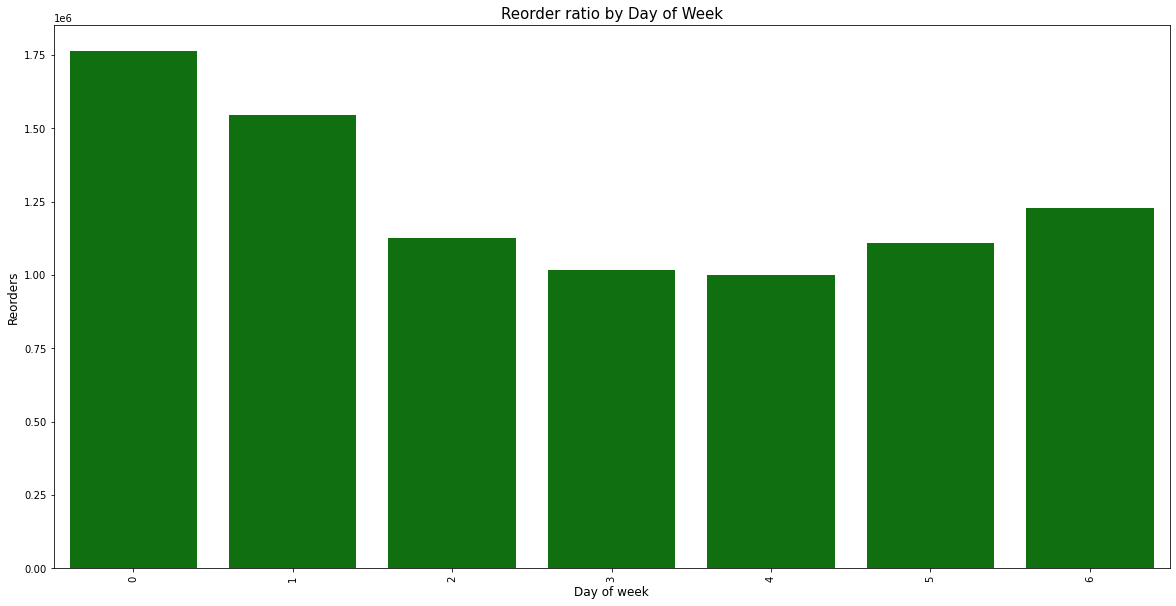

In [30]:
reorder_dow = organic.groupby(["order_dow"])["reordered"].aggregate("count").reset_index()

plt.figure(figsize=(20, 10))
sns.barplot(data=reorder_dow, x='order_dow', y='reordered', color ='green')
plt.ylabel('Reorders', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.title("Reorder ratio by Day of Week", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

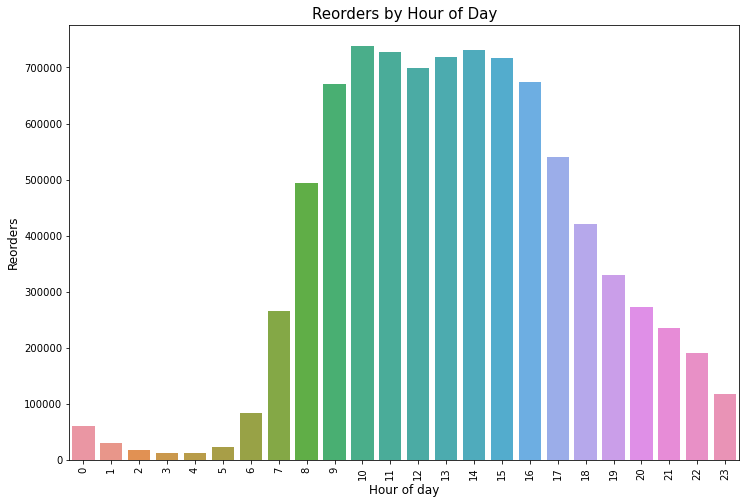

In [27]:
grouped_df = organic.groupby(["order_hour_of_day"])["reordered"].aggregate("count").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(grouped_df['order_hour_of_day'].values, grouped_df['reordered'].values)
plt.ylabel('Reorders', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.title("Reorders by Hour of Day", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

From the two plots above we can see that the rreorder average is highest still for the weekends with the peak hours now being between 10 and 14 or 10:00am to 2:00pm.

Next, ill explore the days since prior orders columns 

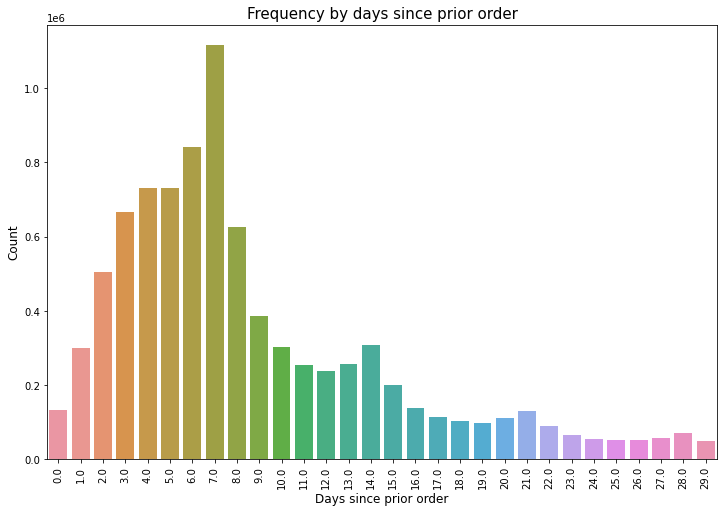

In [31]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=organic)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency by days since prior order", fontsize=15)
plt.show()

the majority of customers placed order once in every week or every 7 days

Next lets check what items customers were purchasing weekly

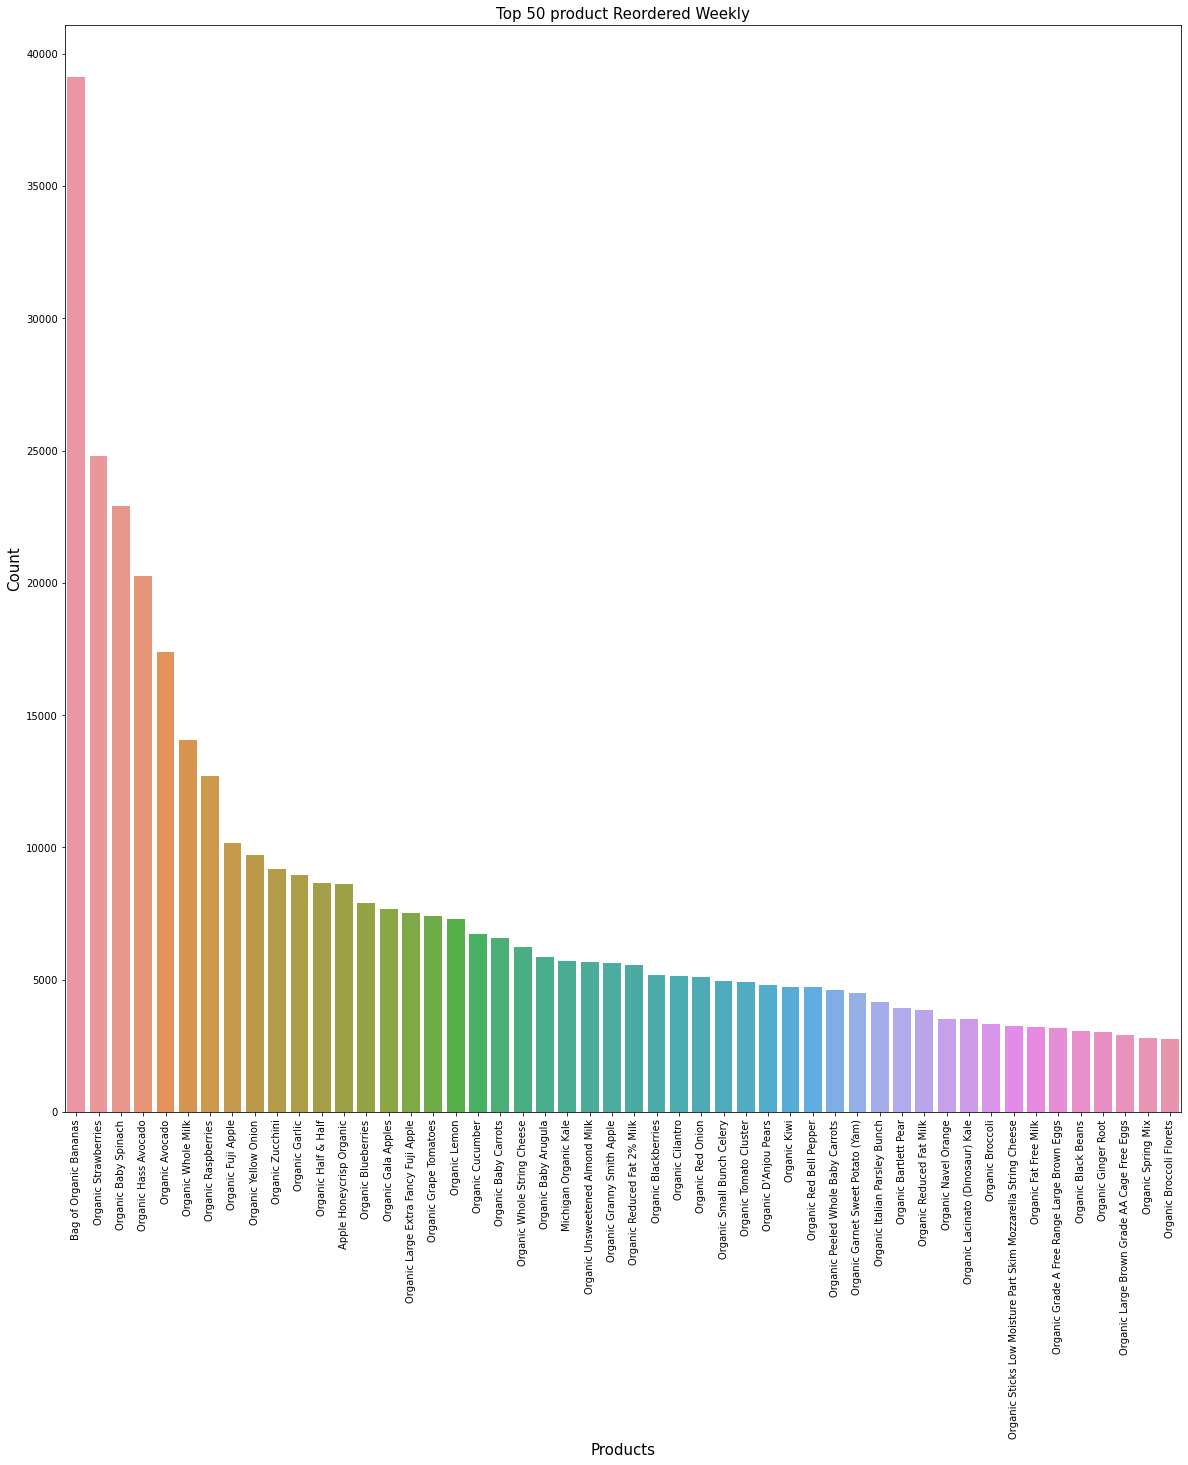

In [33]:
reo = organic[organic.reordered==1]

plt.figure(figsize=(20,20))
sns.barplot(reo[organic.days_since_prior_order==7]['product_name'].value_counts().index[:50],
          reo[organic.days_since_prior_order==7]['product_name'].value_counts().values[:50])
plt.xticks(rotation='vertical')
plt.title("Top 50 product Reordered Weekly",fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xlabel("Products",fontsize=15)
plt.show()

Next, checking the number of products in each order.

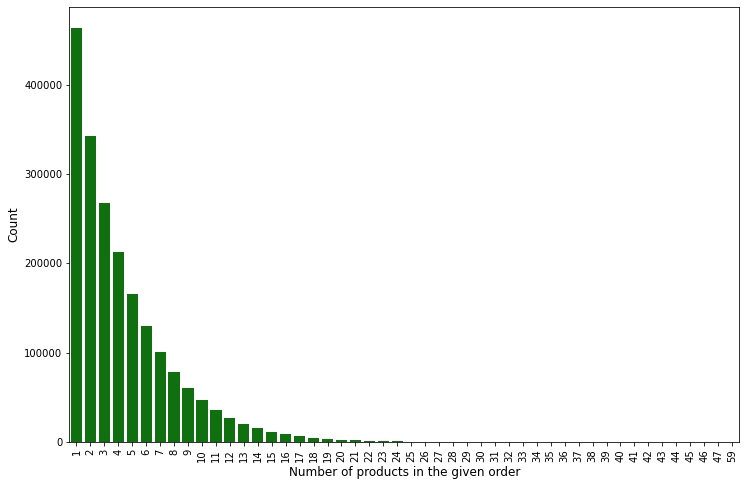

In [79]:
grouped_df = organic.groupby("order_id")["add_to_cart_order"].aggregate("count").reset_index()
count_order = grouped_df.add_to_cart_order.value_counts().head(50)

plt.figure(figsize=(12,8))
sns.barplot(count_order.index, count_order.values, color='green')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Number of products in the given order', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

Next, Lets look at reorders of first time added to cart

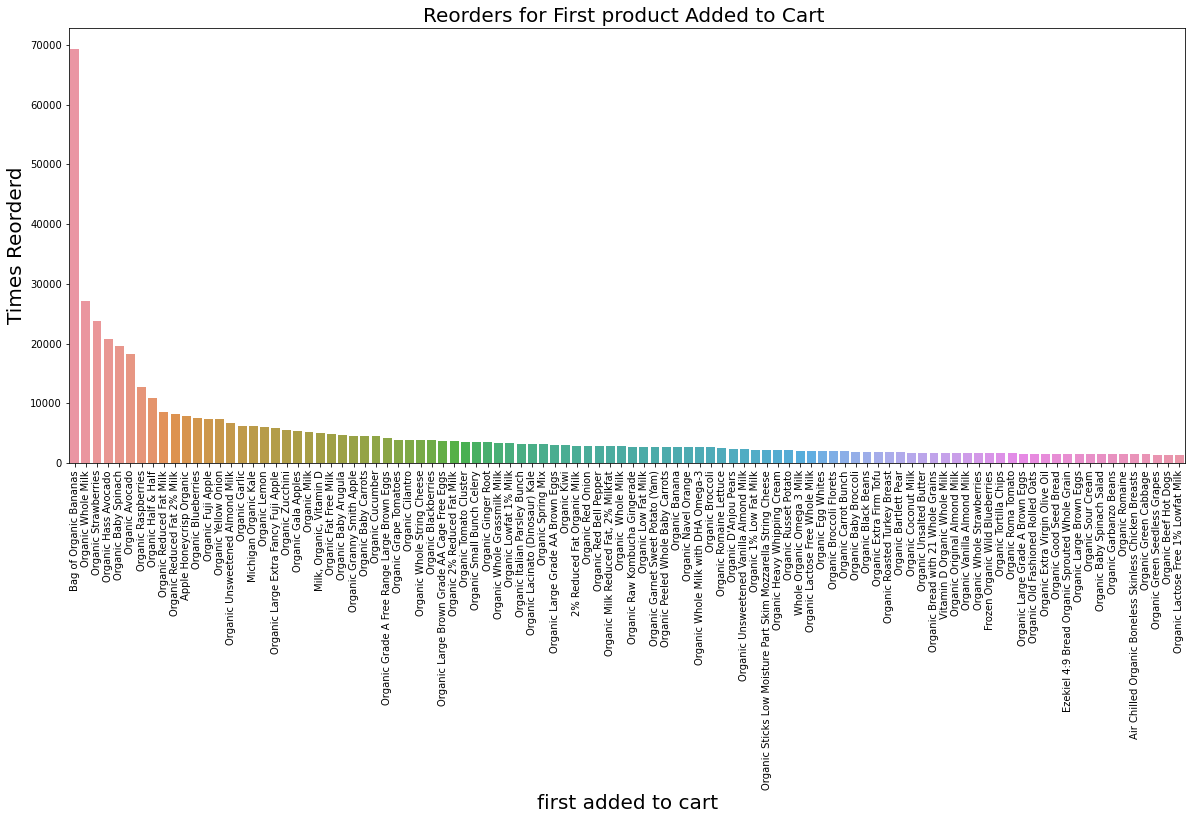

In [47]:
first_item = organic[organic.add_to_cart_order==1]
first_item=first_item[['product_name','add_to_cart_order']].groupby('product_name').agg('sum')
first_item = first_item.sort_values(by='add_to_cart_order',ascending=False).head(100)

plt.figure(figsize=(20,8))
sns.barplot(first_item.index,first_item.add_to_cart_order.values)
plt.xticks(rotation='vertical')
plt.xlabel("first added to cart",fontsize=20)
plt.ylabel("Times Reorderd",fontsize=20)
plt.title("Reorders for First product Added to Cart ",fontsize=20)
plt.show()

The dominant product is a Bag of Organic Bananas, followed by Organic whole milk

Next lets look at reorder rates by add to cart order

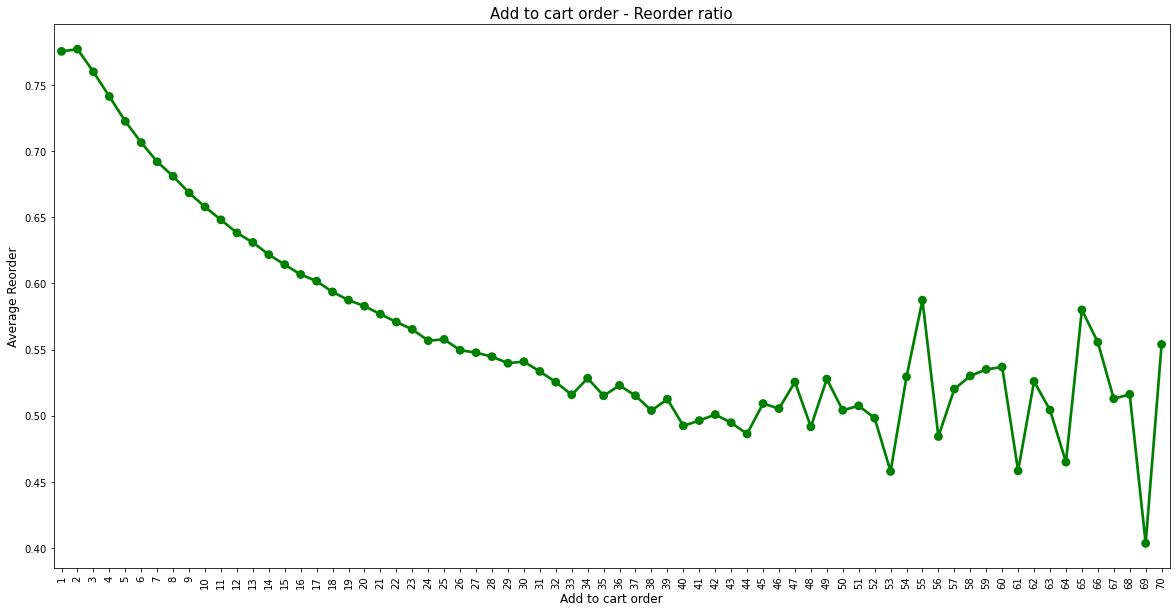

In [78]:
grouped_df = organic.groupby(["add_to_cart_order"])["reordered"].agg('mean').reset_index()

plt.figure(figsize=(20,10))
sns.pointplot(grouped_df['add_to_cart_order'].values, grouped_df['reordered'].values, color='green')
plt.ylabel('Average Reorder', fontsize=12)
plt.xlabel('Add to cart order', fontsize=12)
plt.title("Add to cart order - Reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

This is an interesting visual. Items added to the cart earl on the higher the reorder average. There are some spikes at 45,49, and 50

Next lets take a look at data on Aisles and Departments.

in the data there are 134 Aisles and 21 Deparments

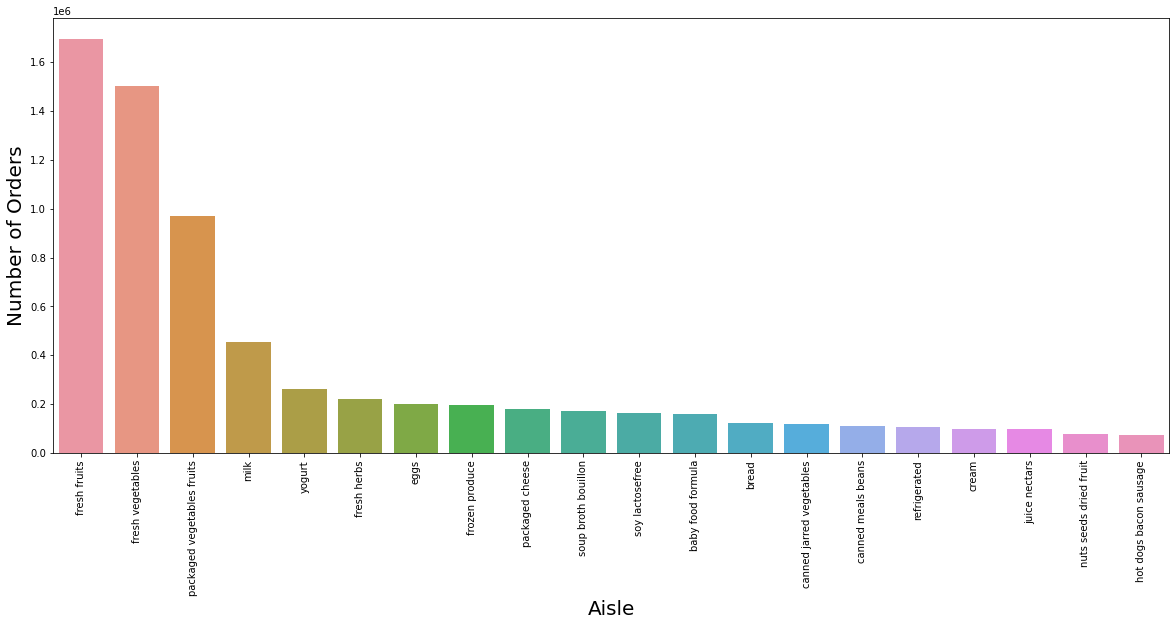

In [52]:
aisle_order = organic['aisle'].value_counts().head(20)

plt.figure(figsize=(20,8))
sns.barplot(aisle_order.index, aisle_order.values)
plt.ylabel('Number of Orders', fontsize=20)
plt.xlabel('Aisle', fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

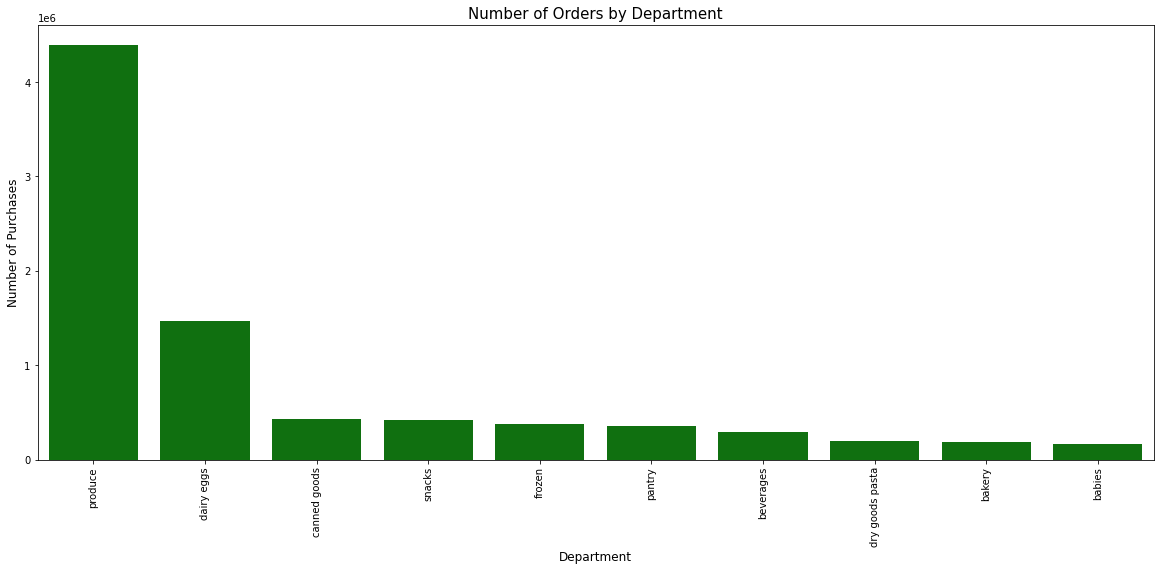

In [72]:
count_dept = organic['department'].value_counts().head(10)
plt.figure(figsize=(20,8))
sns.barplot(x=count_dept.index, y=count_dept.values, color='green')
plt.ylabel('Number of Purchases', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Number of Orders by Department", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

From the two plots above we can see that fresh produce are hot items. Fresh and Packaged Fruits, Vegetables have the highest order numbers and Produce is the most frequent department followed by the Aisle for milk and the department Dairy and Eggs

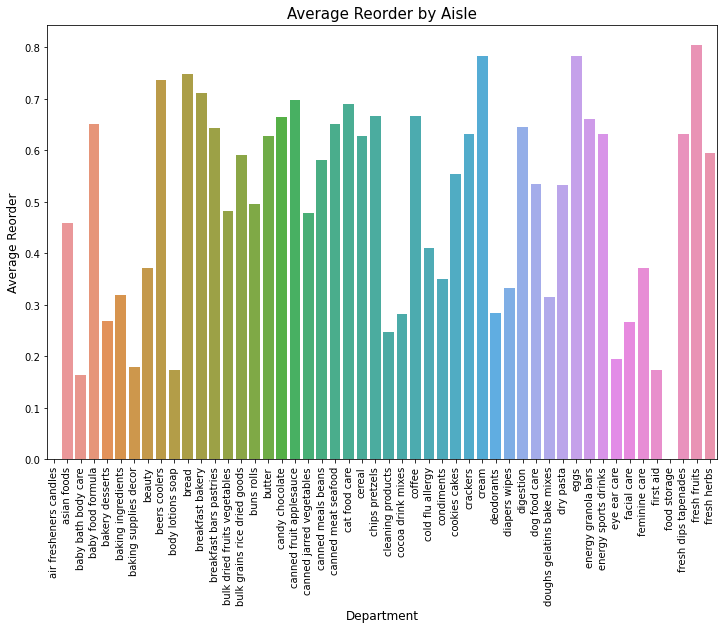

In [74]:
aisle_reo = organic.groupby(["aisle"])["reordered"].aggregate("mean").reset_index().head(50)
#aisle_reo_sorted = aisle_reo.sort_values(by='reordered',ascending=False).head(50)

plt.figure(figsize=(12,8))
sns.barplot(aisle_reo['aisle'].values, aisle_reo['reordered'].values)
plt.ylabel('Average Reorder', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Average Reorder by Aisle", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

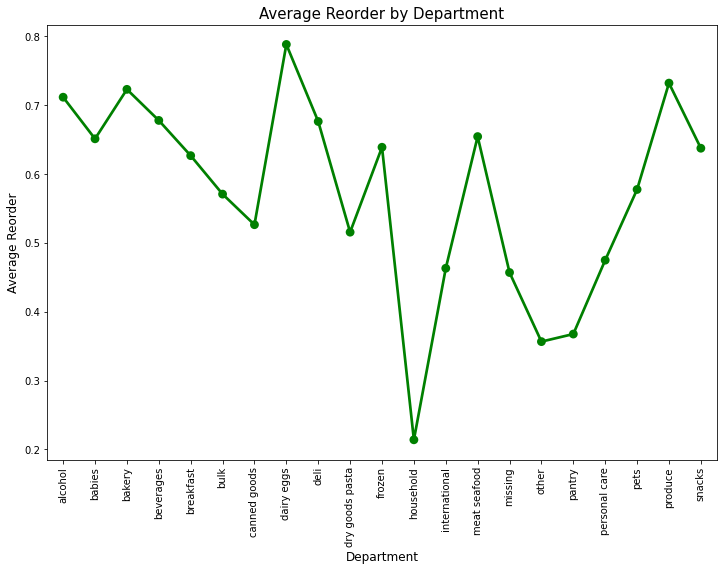

In [75]:
dept_reo = organic.groupby(["department"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(dept_reo['department'].values, dept_reo['reordered'].values, color='green')
plt.ylabel('Average Reorder', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Average Reorder by Department", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

From the two plots above we can see that in aisles for Fresh Fruit, Eggs, and Cream have the highest average reorder and for Departments Dairy & Eggs had the highest average reorder followed by Produce

## Modeling

**NOTE:** Due to the size of the data we have moved the modeling process on predicting reorders into another notebook
- The notebook is titled: Modeling.ipynb

## Association Rule Mining 

Our Association Rule mining using Apriori has been completed in another notebook due to the size of the data.
- The notebook is titled: Association_Rules.ipynb

## Conclusion

Based on the analysis and modeling here are four actionable recommendations:

**1. Promote Organic Produce:**
- Targeted marketing campaigns on organic products
- Highlight the benefits of organic items to attract and retain customers
  
**2. Encourage Frequent Purchases:**
- Implement Loyalty programs & Subscription options
- Personalize recommendations based on purchase history/frequent purchases
  
**3. Leverage Basket Size:**
- Implement strategies to encourage customers to add more items to carts 
- Bundle related products
- Special deals for bulk purchases
  
**4. Enhance Product Placement:**
- Products added later to the cart have a lower chance of being reordered. Explore ways to streamline the add-to-cart process and ensure that customers find what they need quickly
- Optimize the user interface for easier shopping
- Implement "quick add" or one-click reordering features

In conclusion, by implementing these recommendations, GreenGrocer can enhance customer satisfaction, increase customer retention, and drive higher reorder rates, ultimately leading to improved business performance and growth.

## Future Steps

- Collect more data on Organic products and shoppers.
- Use Apriori and Association rule results to build a recommendation system.
- With the right computational resources I would like to explore alternative ways to handle class imbalance and engineer more features.
- Apply Deep Learning models to extract better insights from the data.
- Continuously monitor the impact of these recommendations and Use A/B testing to evaluate the effectiveness of the different strategies.